<a href="https://colab.research.google.com/github/jhaRahul2102/Book-recommendation-using-collaborative-approach/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Importing modules**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


-------------------------------------------------------------------------------------
**1.2. Loading all the datasets.**

In [2]:
#-------------------------------------------- Books -----------------------------------------------

books=pd.read_csv('/content/drive/MyDrive/BX-Books.csv',sep=';',encoding='latin-1',error_bad_lines=False)

#------------------------------------------ User information --------------------------------------------

users=pd.read_csv('/content/drive/MyDrive/BX-Users.csv',sep=';',encoding='latin-1',error_bad_lines=False)

#-------------------------------------------- Rating ---------------------------------------------

ratings=pd.read_csv('/content/drive/MyDrive/BX-Book-Ratings.csv',sep=';',encoding='latin-1',error_bad_lines=False)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3552: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 

-------------------------------------------------------------------------------------

#2. Data insight

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


----------------------------------------------------------------------------------------
**2.2. Columns of books dataset**

In [4]:
print('Column in books dataset:-',end=' ')
books.columns

Column in books dataset:- 

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

------------------------------------------------------------------------------------
**2.3. Dropping unnecessary columns in books dataset:-**




In [5]:
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

* Columns like img url is not needed for recommendation:-*

------------------------------------------------------------------------------------

**2.4. Shape of books columns:-**

In [6]:
print('Shape of books columns:-',end=' ')
books.shape

Shape of books columns:- 

(271360, 5)

------------------------------------------------------------------------------------------
**2.5. Statistical description of books dataset:-**

In [7]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


-------------------------------------------------------------------------------------------------------

**2.6. Analysis of other Dataset:-**

In [8]:
#----------------- User Dataset ------------------------------

print('Shape of users dataset',end=' ')
users.shape

Shape of users dataset 

(278858, 3)

----------------------------------------------------------------------------------------------

In [9]:
#------------------------- Rating --------------------------

print('Shape of ratings dataset',end=' ')
ratings.shape

Shape of ratings dataset 

(1149780, 3)

--------------------------------------------------------------------------------------

In [10]:
#--- Shape of the user dataset:-------------------------

users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


---------------------------------------------------------------------------------------

In [11]:
#----------------- Shape of rating dataset -------------------
ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


----------------------------------------------------------------------------------------

**2.7. Missing value of datasets:-**

In [12]:
#--------- Missing value of book dataset -------------------

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [13]:
#------- Missing value of rating dataset --------------------
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

-----------------------------------------------------------------------------------------
**2.8. Replacing value of missing value.**

In [15]:
books['Book-Author'].fillna(books['Book-Author'].mode,inplace=True)   # Replacing with Mode.

In [16]:
books['Publisher'].fillna(books['Publisher'].mode,inplace=True)      # Replacing with Mode.

In [17]:
users['Age'].fillna(users['Age'].mean(),inplace=True)                # Replacing with Mean.

--------------------------------------------------------------------------------------

# 3. Data Visualization:-

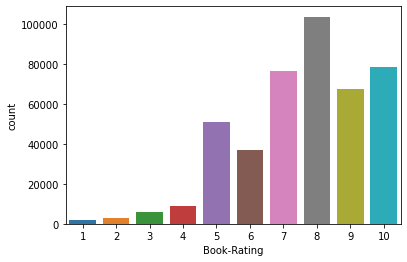

In [18]:
rat1=ratings[ratings['Book-Rating']!=0]
sns.countplot(x=rat1['Book-Rating'],data=rat1)

* We replace books with 0 rating .....
-------------------------------------------------------------------------------------

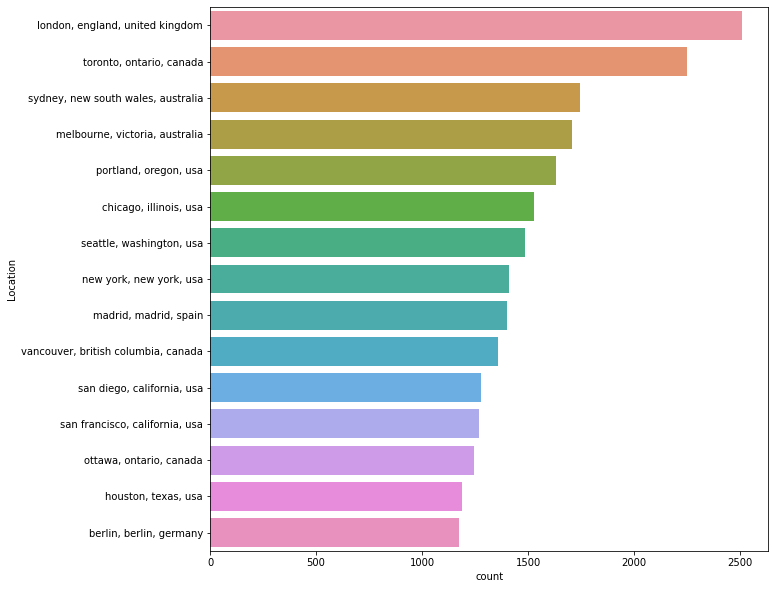

In [19]:
# ------------  Based on Location user rating:- ------------------------------

plt.figure(figsize=(10,10))
sns.countplot(y="Location", data=users,order=users['Location'].value_counts().index[0:15])
plt.show()

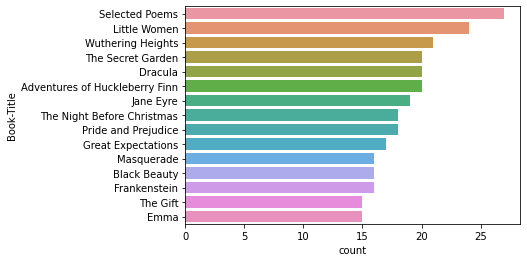

In [20]:
#----------- Top 15 books based on user rating ----------------
sns.countplot(y="Book-Title", data=books, order=books['Book-Title'].value_counts().index[0:15])

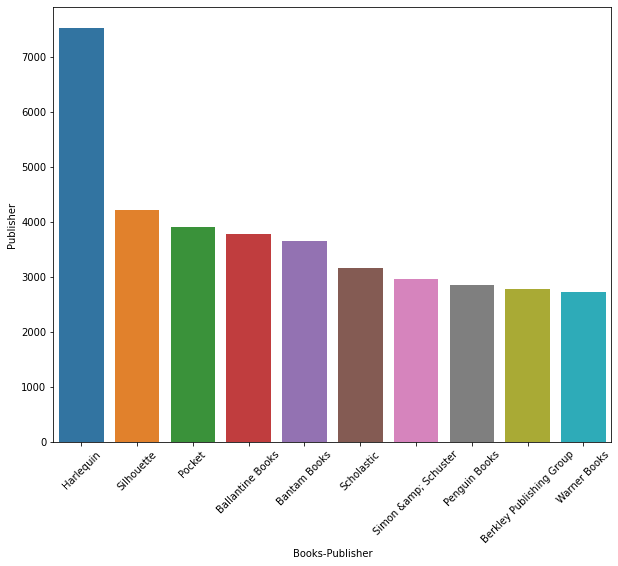

In [21]:
# Top 10 book Publisher with most number of book published :- ---------------

d=books['Publisher'].value_counts()[:10].reset_index()
#----------------------------------------------------------------------

plt.figure(figsize=(10,8))
sns.barplot(x='index',y='Publisher',data=d)
plt.xticks(rotation=45)
plt.xlabel('Books-Publisher')
plt.show()

 # 4. **Preprocessing of datasets:-**

---------------------------------------------------------------------------------------

**No of user that reviewed the books:-**

We are only including user who have review more than 50.

In [22]:
y=ratings['User-ID'].value_counts()>200
index=y[y].index
ratings=ratings[ratings['User-ID'].isin(index)]

------------------------------------------------------------------------------------------

**Merging rating and book columns:-**

In [23]:
book_r=ratings.merge(books,on='ISBN')

------------------------------------------------------------------------------------------------------------

**Filtering review to be numbe rof review more than 50 review per book.**

In [24]:
book_r_b=book_r.groupby(['Book-Title'])['Book-Rating'].count().reset_index()
book_r=book_r.merge(book_r_b,on='Book-Title').rename(columns={'Book-Rating_y':'Total-no-of-Rating'})


In [25]:
book_r_b=book_r[book_r['Total-no-of-Rating']>50]

---------------------------------------------------------------------------------------------

**Dropping duplicate**

In [26]:
book_r_b=book_r_b.drop_duplicates(['Book-Title','User-ID'])

--------------------------------------------------------------------------------------------

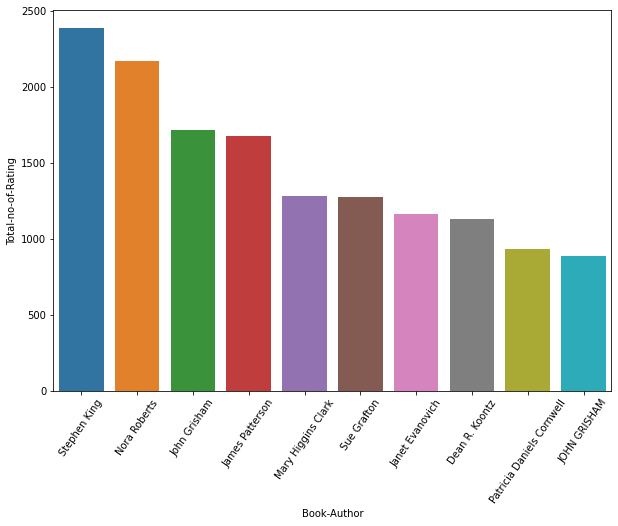

In [27]:
# Top best author based on rating:-

plt.figure(figsize=(10,7))
data_book=book_r_b.groupby('Book-Author')['Total-no-of-Rating'].count().sort_values(ascending=False)[:10].reset_index()
sns.barplot(x='Book-Author',y='Total-no-of-Rating',data=data_book)
plt.xticks(rotation=55)
plt.show()

# 5. Creating pivot table between user and book title.

In [28]:
final=book_r_b.pivot_table(values='Book-Rating_x',columns='User-ID',index='Book-Title')
final.fillna(0,inplace=True)

---------------------------------------------------------------------------------------------------

**Creating sparse matrix to reduce the matrix complexity**

In [29]:
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(final)

-------------------------------------------------------------------------------------------------------------------------------

**6.Model Processing**

In [30]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')

model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [37]:
distances,suggestion=model.kneighbors(final.iloc[254,:].values.reshape(1,-1),n_neighbors=6)
distances

array([[ 0.        , 41.43669871, 42.69660408, 43.43961326, 43.829214  ,
        44.18144407]])

#- 7.Book recommendation:- -----------

In [38]:
def recommend_book(book):
  index=np.where(final.index==book)[0][0]
  distances,suggestion=model.kneighbors(final.iloc[index,:].values.reshape(1,-1),n_neighbors=6)
  for i in range(len(suggestion)):
    print(final.index[suggestion[i]][1:])

recommend_book('1984')

Index(['No Safe Place', 'A Civil Action', 'Foucault's Pendulum',
       'Long After Midnight', 'Master of the Game'],
      dtype='object', name='Book-Title')


**8. Frontend with streamlit**

In [39]:
#-------- Modules ------------------------------------------------------
import streamlit as st  # For webpage
import pickle           # Installing model
from PIL import Image   
import requests         
import numpy as np



#-------------- Page Configuration -----------------------
st.set_page_config(page_title='Book Recommender', page_icon='📚',
                   layout='centered', initial_sidebar_state='expanded')

#----------------- Recommenation book ------------------
def main():
  pivot_table=pickle.load(open('book_tag.pkl','rb'))
  model=pickle.load(open('model.pkl','rb'))
  image=pickle.load(open('image (1).pkl','rb'))
  book_info=pickle.load(open('info_book.pkl','rb'))

  st.title('Book Recommendation Engine 📖')
  book=st.selectbox('Enter name of the book',pivot_table.index)
  if book is not None:
    url=image[image['Book-Title']==book]['Image-URL-M'].values[0]
    im2= Image.open(requests.get(url, stream=True).raw)
    st.sidebar.markdown('**Book you choose**:- **{}**'.format(book))
    st.sidebar.image(im2,width=120)
    st.sidebar.text('------------------------------------------')
  
    recommendation=st.button('Recommend Book')
    index=np.where(pivot_table.index==book)[0][0]
    distances,suggestion=model.kneighbors(pivot_table.iloc[index,:].values.reshape(1,-1),n_neighbors=6)
    with st.spinner():
      if (recommendation is not False):
        book1,book2,book3,book4,book5=pivot_table.index[suggestion[0][1:]]
        col1,col2, col3, col4, col5= st.columns(5)
        with col1:
          st.markdown('**{}**'.format(book1))
          url=image[image['Book-Title']==book1]['Image-URL-L'].values[0]
          im2=Image.open(requests.get(url, stream=True).raw)
          st.image(im2)
    
        with col2:
          st.markdown('**{}**'.format(book2))
          url=image[image['Book-Title']==book2]['Image-URL-L'].values[0]
          im2=Image.open(requests.get(url, stream=True).raw)
          st.image(im2)
    

        with col3:
          st.markdown('**{}**'.format(book3))
          url=image[image['Book-Title']==book3]['Image-URL-L'].values[0]
          im2=Image.open(requests.get(url, stream=True).raw)
          st.image(im2)
    
    
        with col4: 
          st.markdown('**{}**'.format(book4))
          url=image[image['Book-Title']==book4]['Image-URL-L'].values[0]
          im2=Image.open(requests.get(url, stream=True).raw)     
          st.image(im2)
   
  
        with col5:  
          st.markdown('**{}**'.format(book5))
          url=image[image['Book-Title']==book5]['Image-URL-L'].values[0]
          im2=Image.open(requests.get(url, stream=True).raw) 
          st.image(im2)

if __name__=='__main__':
  main()

FileNotFoundError: ignored

**Streamlit need special port to run the app.**

In [ ]:
!streamlit run app.py & npx localtunnel --8501